In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import Functions

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from INL2.Functions import dunn_index

In [5]:
# Load data and standardize
raw_df = pd.read_csv("./Dataset/Clean.csv")
scaled_df = Functions.standardize(raw_df)

In [6]:
# Find silhouette scores for different amount of clusters
n_range = [*range(2,13)]
silhouette_scores = Functions.generate_silhouette_scores(n_range, scaled_df, "agglomerative")

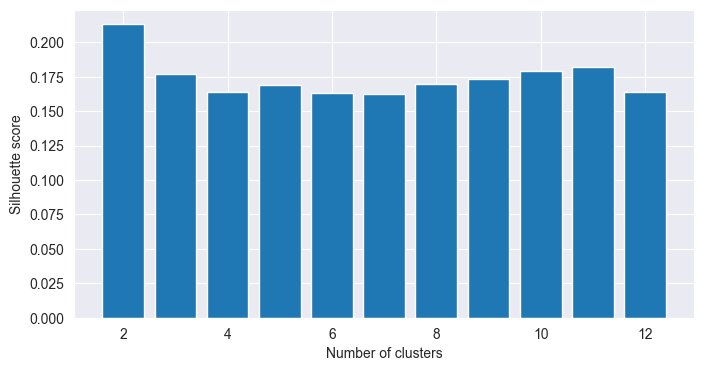

In [7]:
# Plot showing silhouette scores
Functions.bar_plot(n_range, silhouette_scores, "Number of clusters", "Silhouette score", size=(8,4))

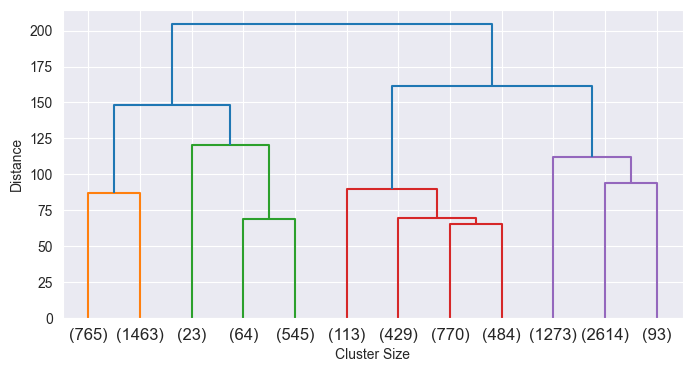

In [21]:
linkage_matrix = shc.linkage(scaled_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 4))
shc.dendrogram(linkage_matrix, truncate_mode='lastp', p=12)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [24]:
print(linkage_matrix.shape)

(8635, 4)


             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                   
0         950.548738           0.810685    376.408332        252.245744   
1         587.984554           0.965491   1203.255754        542.972899   
2        3753.042840           0.961411    536.139065        311.815189   
3        3093.292057           0.990472   5059.375025       3176.725222   
4        4812.382778           0.956126  27505.339565      22417.452174   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    124.600068    503.194403             0.263509   
1                    660.382401     69.956129             0.919454   
2                    224.392734   3412.730738             0.326296   
3                   1883.635025    427.997293             0.951233   
4                   5087.887391   1617.786145         

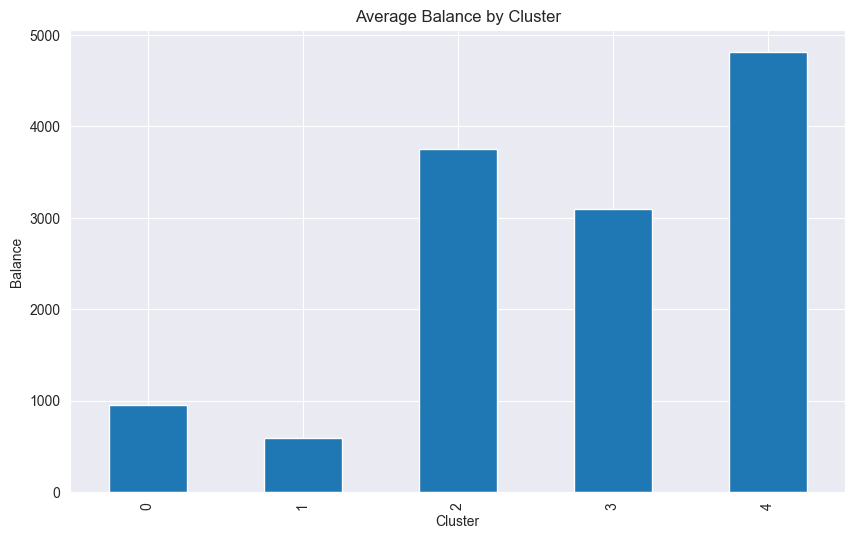

In [9]:
agg = AgglomerativeClustering(n_clusters=5)
c = agg.fit_predict(scaled_df)

raw_df["Cluster"] = pd.Series(c, index=raw_df.index)

cluster_summary = raw_df.groupby('Cluster').mean()

print(cluster_summary)

cluster_summary['BALANCE'].plot(kind='bar', title='Average Balance by Cluster', figsize=(10, 6))
plt.ylabel('Balance')
plt.show()

In [15]:
# Get evaluation metrics
score = silhouette_score(scaled_df, c)
print(score)
index = Functions.dunn_index(scaled_df, c)
print(index)

0.16910540828136691
0.008932949197900383


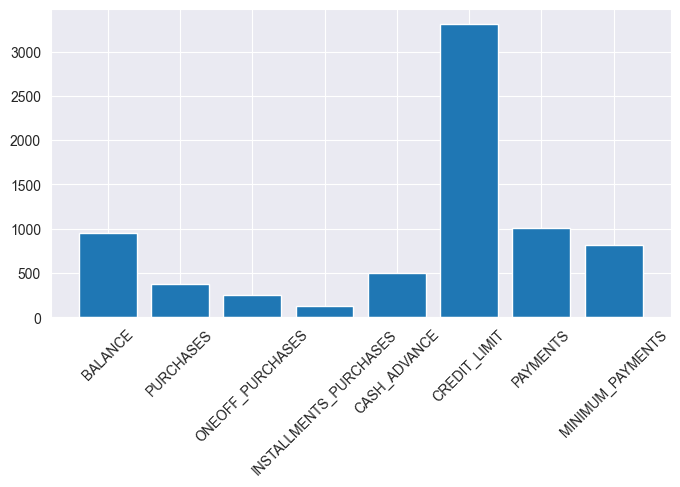

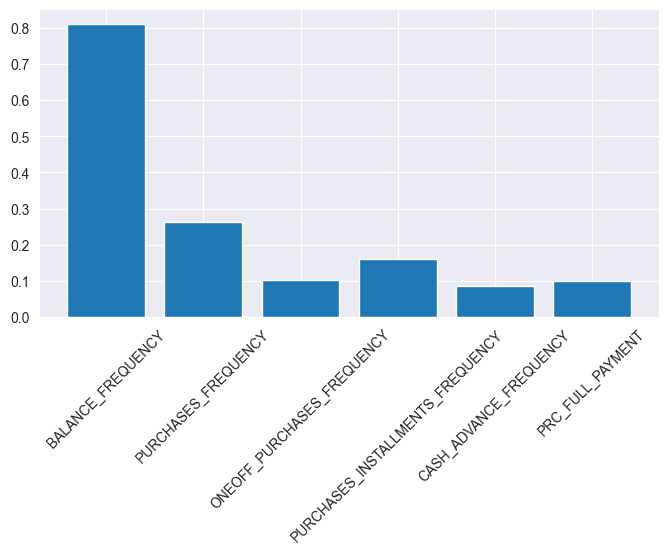

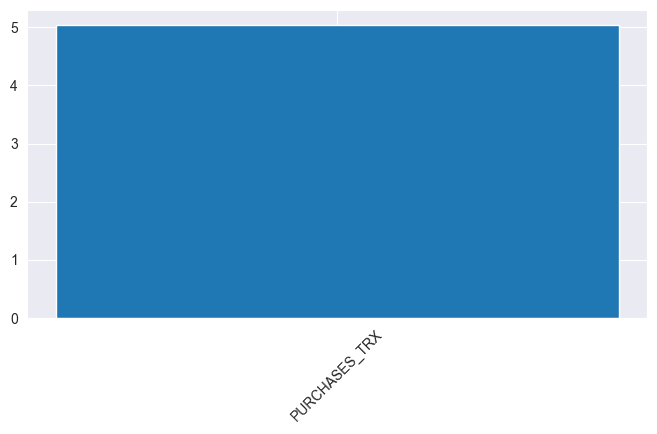

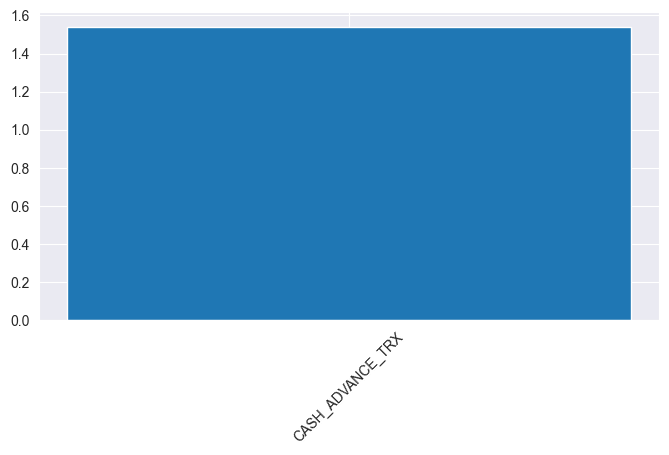

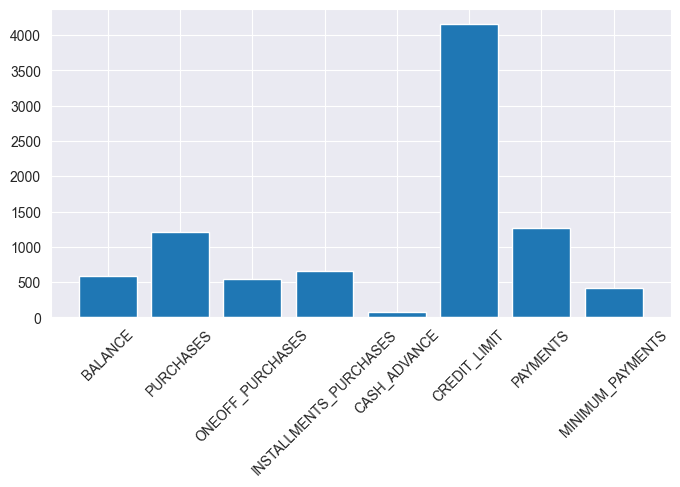

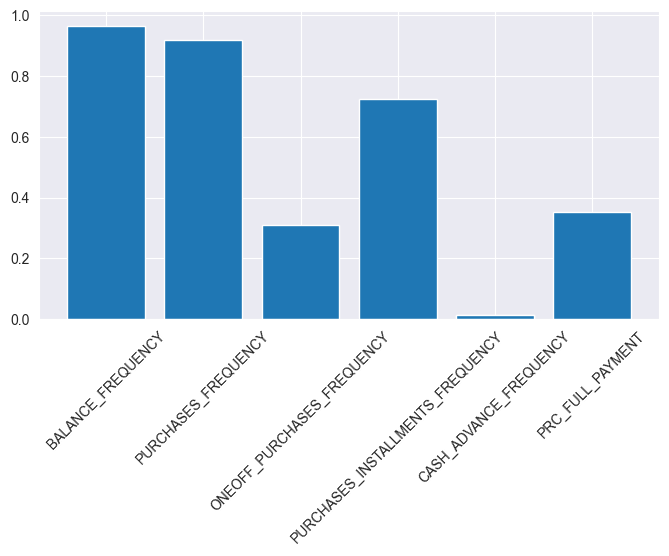

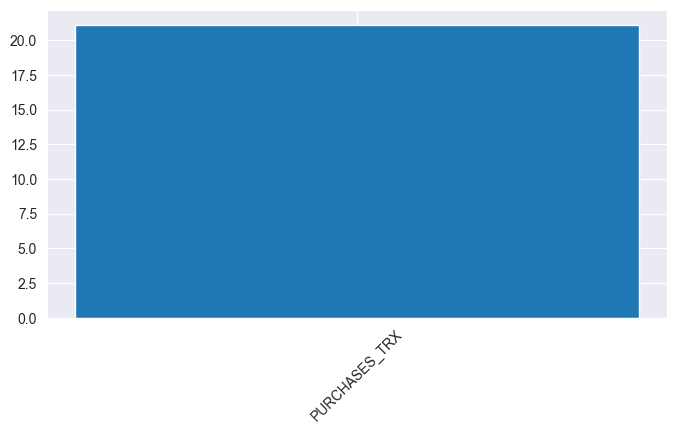

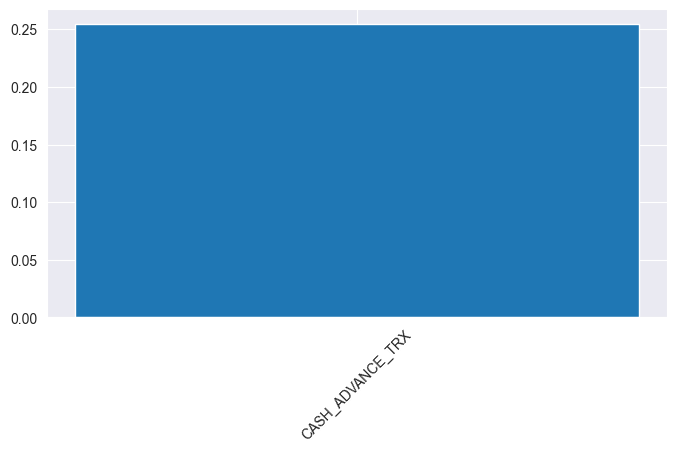

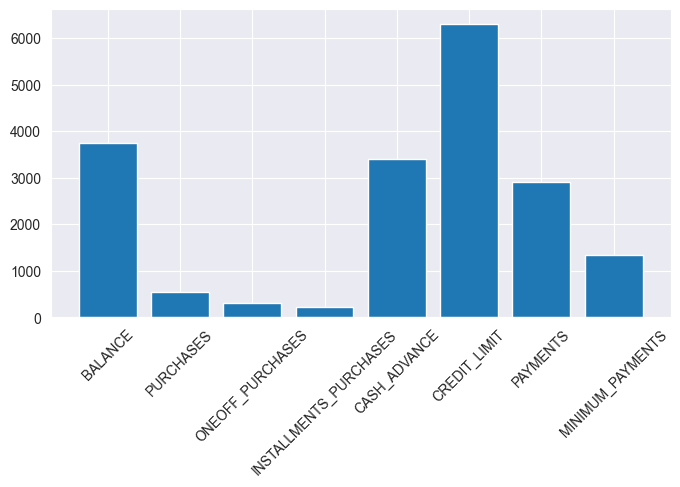

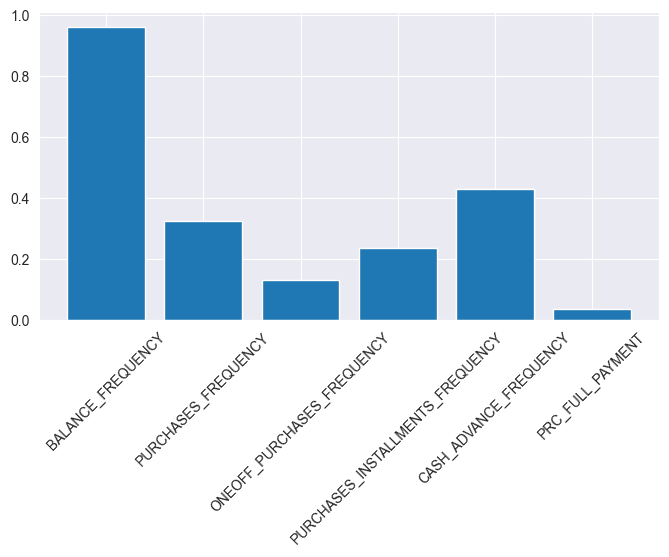

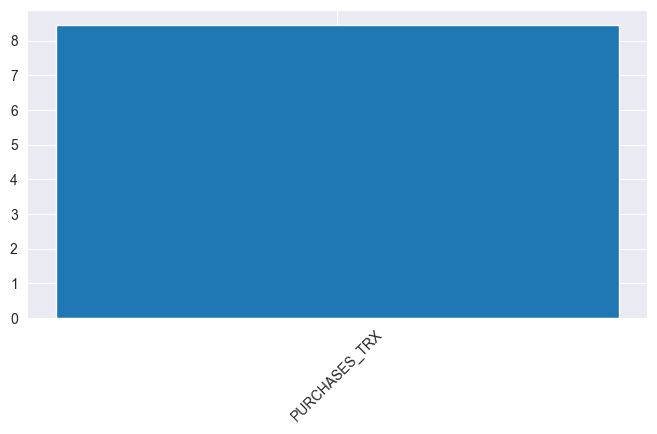

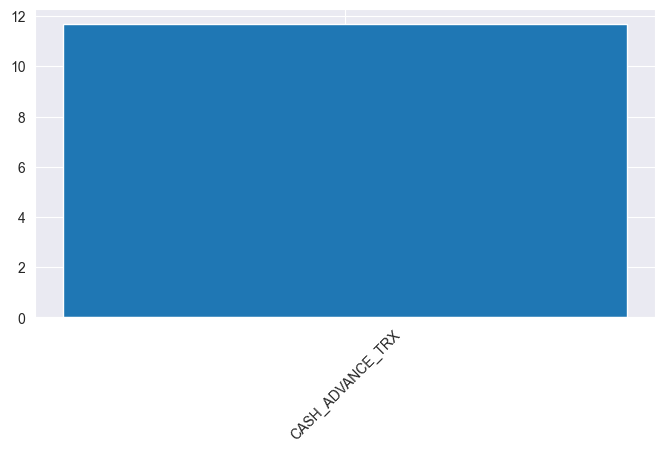

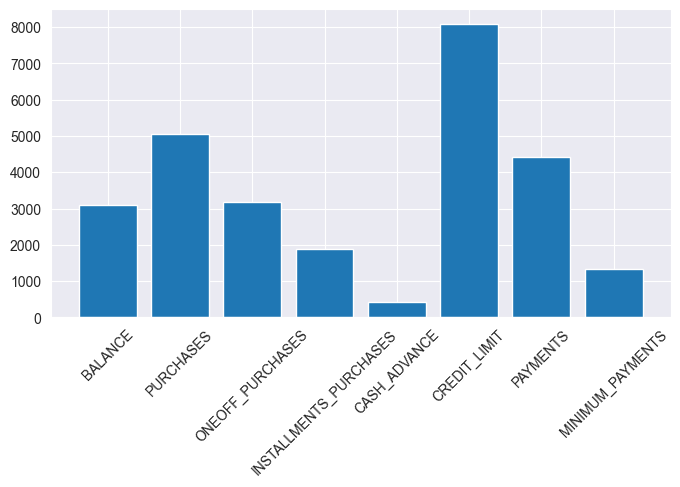

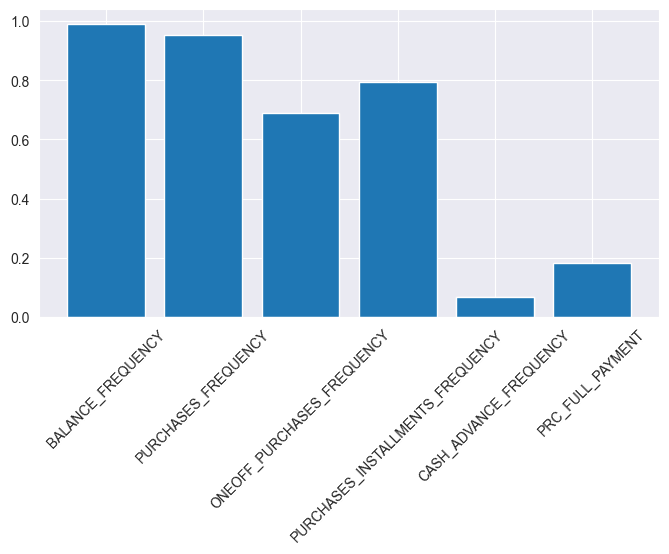

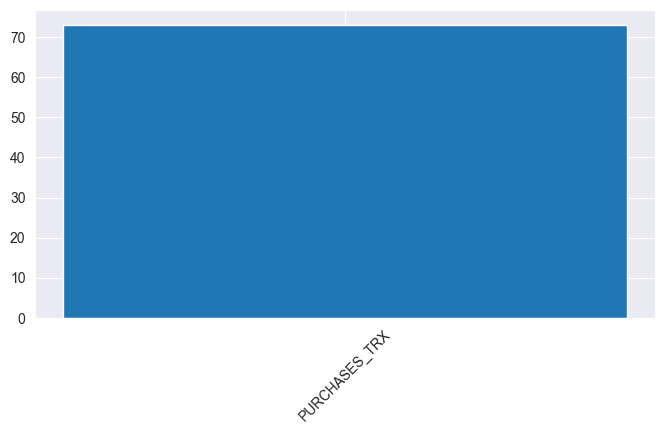

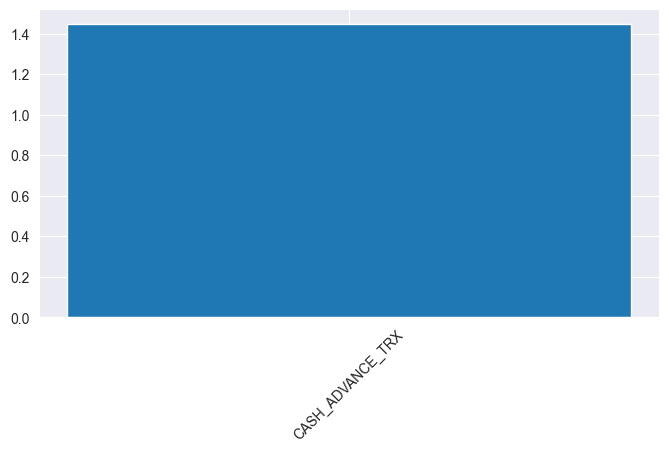

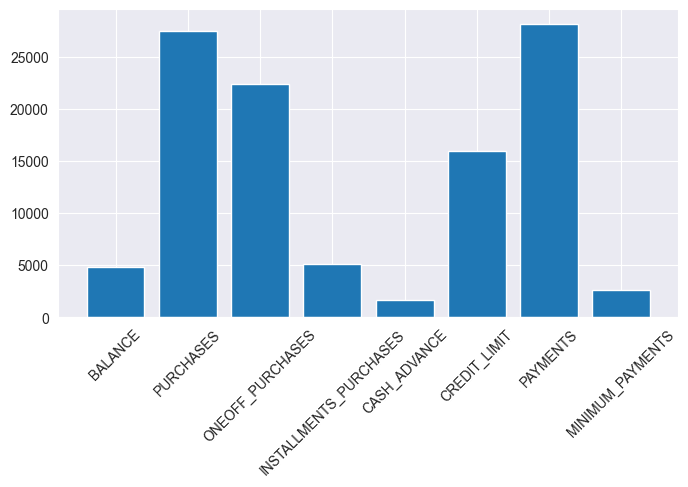

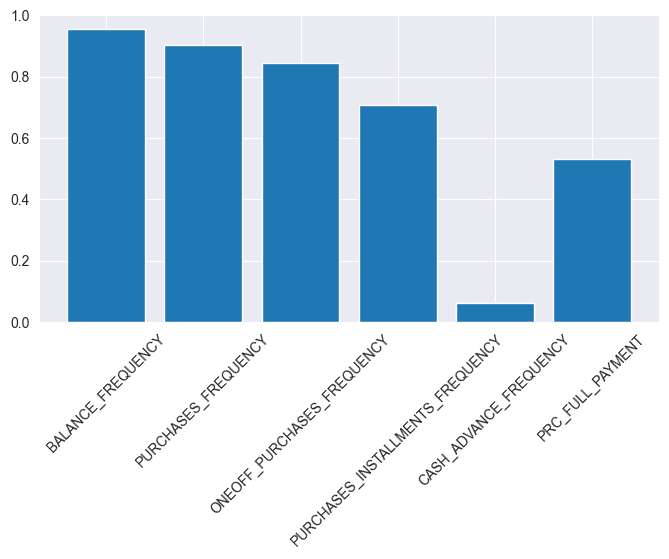

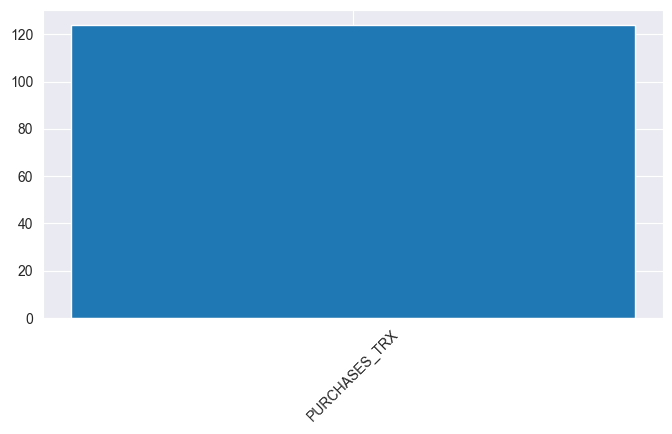

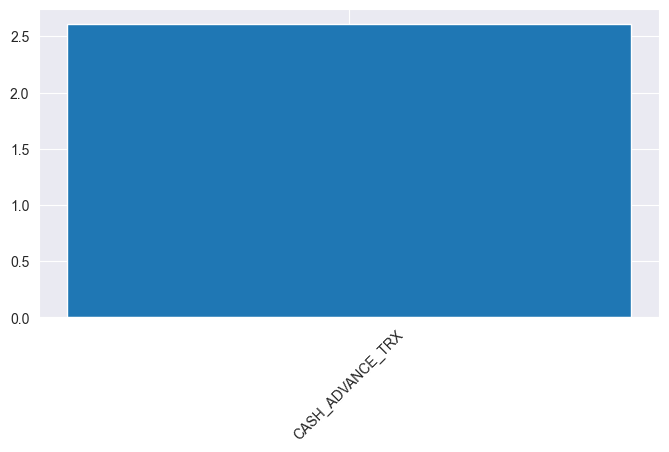

In [11]:
plot1_cols = ["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
plot2_cols = ["BALANCE_FREQUENCY", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "PRC_FULL_PAYMENT"]

for i in range(0,5):
    size=(8,4)
    
    # Create the first plot
    values = []
    for col in plot1_cols:
        values.append(raw_df[raw_df['Cluster'] == i][col].mean())
    Functions.bar_plot(plot1_cols, values, size=size, rotation=45)
    
    # Create the second plot
    values = []
    for col in plot2_cols:
        values.append(raw_df[raw_df['Cluster'] == i][col].mean())
    Functions.bar_plot(plot2_cols, values, size=size, rotation=45)
    
    #Create the third plot
    values = [raw_df[raw_df['Cluster'] == i]["PURCHASES_TRX"].mean()]
    Functions.bar_plot(["PURCHASES_TRX"], values, size=size, rotation=45)
    
    #Create the fourth plot
    values = [raw_df[raw_df['Cluster'] == i]["CASH_ADVANCE_TRX"].mean()]
    Functions.bar_plot(["CASH_ADVANCE_TRX"], values, size=size, rotation=45)